## 4. Data Story Exercise
####  This exercise provides an opportunity for exploratory data analysis, as a basis for developing a data story and as a means to generate questions and hypotheses for further work.  In this exercise, I use the data set on Kiva microloans, on which I have proposed to focus my capstone project.  Below I have addressed the exercise's tasks, and have presented graphics with descriptive titles.  At the end of the analysis, I make some observations, attempt to draw some insights, and begin to develop a narrative that can accompany and illuminate my analysis of this data set.

In [1]:
%matplotlib inline

In [104]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
import cPickle as pk
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
handle=open('../../capstone_project/data/Kenya.pickle','r')
df2=pk.load(handle)
handle.close()

In [6]:
df2.columns

Index([                                      u'activity',
                                        u'basket_amount',
                             u'bonus_credit_eligibility',
                                              u'country',
                                         u'country_code',
                        u'currency_exchange_loss_amount',
                                           u'delinquent',
                                          u'description',
                                        u'funded_amount',
                                          u'funded_date',
                                            u'geo.level',
                                            u'geo.pairs',
                                             u'geo.type',
                                                   u'id',
                                            u'languages',
                                         u'lender_count',
                                          u'loan_amount',
              

## 2.1 Count something interesting  
Here are the twenty most-frequent descriptors of the Kiva loans in Kenya. Each entry has only one of these descriptors. There seems to be some overlap in the areas covered by the activities. For example, it is not clear that *Retail* should not also include *Clothing Sales*. Does *Agriculture* include *Poultry* or *Cereals*, and should they all not fall under *Farming*?  Below this one finds counts of the loans in each of several sectors.

### Loans for Farming and Retail Activities Dominate

In [7]:
df2['activity'].value_counts().head(20)

Farming                  18326
Dairy                     6762
Retail                    4622
Clothing Sales            4528
General Store             4436
Fruits & Vegetables       4426
Agriculture               4191
Poultry                   3504
Cereals                   2713
Grocery Store             2649
Tailoring                 2536
Motorcycle Transport      2532
Food Stall                2484
Charcoal Sales            1917
Beauty Salon              1830
Fish Selling              1572
Food Production/Sales     1566
Used Clothing             1328
Food                      1294
Food Market               1138
Name: activity, dtype: int64

### Agriculture, Food, and Retail Loans Dominate Economic Sectors

In [238]:
df2['sector'].value_counts().head(15)

Agriculture       35675
Food              21470
Retail            15618
Services           8024
Clothing           6650
Transportation     3287
Construction       1626
Education          1361
Health             1175
Personal Use        977
Manufacturing       816
Housing             731
Arts                457
Entertainment       128
Wholesale           124
Name: sector, dtype: int64

## 2.2 Find trends and extremes  
### Two of the largest loans have been in the area of renewable energy

In [8]:
test=df2[df2.funded_amount==df2.funded_amount.max()].iloc[:,[0,8]]
test
#test.reset_index().iloc[0,:]

,activity,funded_amount
18281,Utilities,50000
18939,Renewable Energy Products,50000
22991,Renewable Energy Products,50000
33910,Agriculture,50000


### The smallest loans have been for just 25 USD

In [9]:
df2a = df2[df2.funded_amount>0]
test2=df2a[(df2a.funded_amount==df2a.funded_amount.min())&((df2a.status== 'paid')|(df2a.status=='in_repayment'))]
test2[['activity','sector','funded_amount','loan_amount','status']]

,activity,sector,funded_amount,loan_amount,status
43440,Agriculture,Agriculture,25,25,paid
59197,Farming,Agriculture,25,25,in_repayment
67390,Agriculture,Agriculture,25,25,paid
67721,Bicycle Repair,Services,25,25,paid
71473,Food Production/Sales,Food,25,25,paid
72923,Agriculture,Agriculture,25,25,paid
74082,Shoe Sales,Retail,25,25,paid
76591,Bakery,Food,25,25,paid


In [10]:
def mktime(x):
    try:
        tym=dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ")
        return tym
    except:
        return np.nan

In [11]:
def getyear(x):
    try:
        yr=np.int(x.year)
        return yr
    except:
        return np.nan

In [12]:
fun_dat=df2a['funded_date'].apply(mktime)

In [13]:
df2a.loc[:,'funded_datetime']=fun_dat  # I checked to see that it is there, and it is

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df2a.columns

Index([                                      u'activity',
                                        u'basket_amount',
                             u'bonus_credit_eligibility',
                                              u'country',
                                         u'country_code',
                        u'currency_exchange_loss_amount',
                                           u'delinquent',
                                          u'description',
                                        u'funded_amount',
                                          u'funded_date',
                                            u'geo.level',
                                            u'geo.pairs',
                                             u'geo.type',
                                                   u'id',
                                            u'languages',
                                         u'lender_count',
                                          u'loan_amount',
              

In [15]:
fun_year=df2a['funded_datetime'].apply(getyear)

In [16]:
type(fun_year)          # turns out the effort to get an int here isn't going

pandas.core.series.Series

In [17]:
df2a.loc[:,'funded_year']=fun_year

In [18]:
df2b=df2a[(df2a.funded_year.isnull()==False)&(df2a.funded_year!=2016.0)]

### Funded loans are increasing again

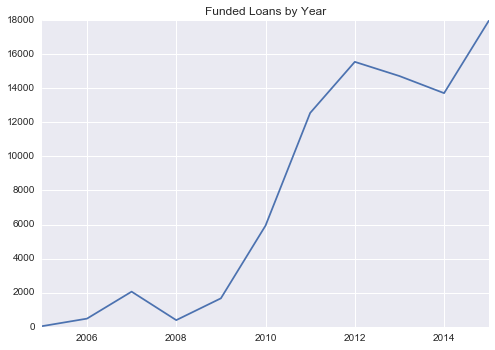

In [19]:
df2b.funded_year.value_counts().sort_index().plot(title='Funded Loans by Year');

In [20]:
df2b.sector.value_counts()

Agriculture       29243
Food              19199
Retail            13785
Services           7364
Clothing           5987
Transportation     2811
Construction       1530
Health             1076
Education           994
Personal Use        922
Manufacturing       775
Housing             669
Arts                418
Entertainment       126
Wholesale           114
Name: sector, dtype: int64

In [21]:
df2c=df2b.groupby(['sector','funded_year']).size()

### The increase is due to increasing support for agriculture 

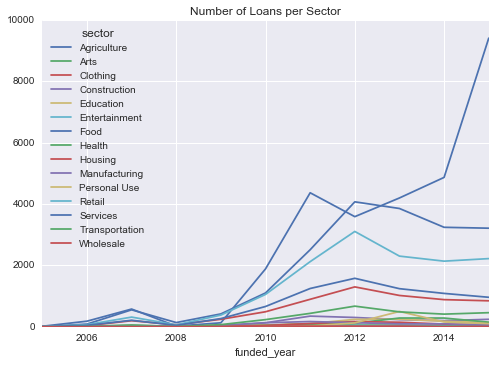

In [22]:
df2c.unstack('sector').fillna(0).plot(title='Number of Loans per Sector')

In [23]:
df2c.unstack('sector').fillna(0)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
funded_year,,,,,,,,,,,,,,,
2005.0,17.0,0.0,1.0,2.0,0.0,0.0,4.0,0.0,5.0,1.0,0.0,4.0,6.0,0.0,0.0
2006.0,183.0,18.0,38.0,10.0,0.0,0.0,88.0,4.0,9.0,3.0,0.0,70.0,48.0,8.0,0.0
2007.0,578.0,58.0,198.0,32.0,1.0,2.0,553.0,46.0,12.0,28.0,0.0,316.0,213.0,23.0,2.0
2008.0,22.0,10.0,66.0,8.0,0.0,2.0,138.0,17.0,7.0,4.0,0.0,64.0,47.0,5.0,1.0
2009.0,130.0,10.0,245.0,16.0,21.0,8.0,420.0,26.0,13.0,51.0,0.0,382.0,268.0,71.0,9.0
2010.0,1887.0,43.0,490.0,131.0,58.0,14.0,1103.0,47.0,43.0,132.0,9.0,1055.0,662.0,234.0,26.0
2011.0,4367.0,69.0,896.0,348.0,105.0,16.0,2511.0,98.0,106.0,171.0,26.0,2123.0,1248.0,438.0,21.0
2012.0,3589.0,57.0,1300.0,304.0,242.0,47.0,4072.0,116.0,170.0,133.0,127.0,3107.0,1580.0,673.0,23.0
2013.0,4198.0,53.0,1021.0,234.0,248.0,16.0,3855.0,286.0,148.0,96.0,500.0,2303.0,1242.0,486.0,21.0


In [220]:
df2c1= df2b[(df2b['sector']=='Agriculture')&((df2b.prop_female==1)|(df2b.prop_female==0))].groupby(['prop_female','funded_year'],as_index=False).size()
df2c1=df2c1.unstack('prop_female').reset_index()
df2c1.loc[:,'Female']=df2c1.iloc[:,2]
df2c1.loc[:,'Male']=df2c1.iloc[:,1]
cols=[1,2]
df2c1=df2c1.drop(df2c1.columns[cols],axis=1)
df2c1

prop_female,funded_year,Female,Male
0,2005.0,16,1
1,2006.0,165,18
2,2007.0,500,78
3,2008.0,10,10
4,2009.0,76,54
5,2010.0,765,1122
6,2011.0,1621,1982
7,2012.0,1677,1572
8,2013.0,1777,1744
9,2014.0,2681,1532


### Growth in Agriculture Sector Loans: More Loans to Women

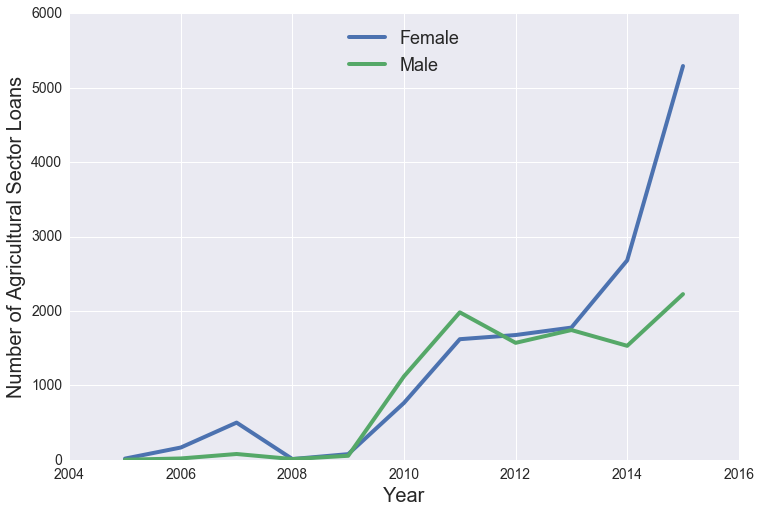

In [236]:
fig=plt.figure(figsize=(12,8),facecolor='white')          #open a figure
ax=fig.add_subplot(1,1,1)#, axisbg='white')
ax.spines['bottom'].set_color('red')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Number of Agricultural Sector Loans',fontsize=20)

ax.plot(df2c1.iloc[:,0], df2c1.iloc[:,1],linewidth=4)
ax.plot(df2c1.iloc[:,0], df2c1.iloc[:,2],linewidth=4)

ax.legend(loc='upper center', prop={'size':18})         #display a legend
for tick in ax.xaxis.get_major_ticks():                 #set the size of the tick labels on the x-axis
                tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():                 #set the size of the tick labels on the y-axis
                tick.label.set_fontsize(14)



## 2.3 Make bar plots or histograms

In [24]:
df2d=df2a[(df2a.funded_year.isnull()==False)&(df2a.funded_year!=2016.0)]

In [25]:
arr =np.array(df2d.funded_amount[df2d.funded_amount<=2500])
loans=pd.cut(arr,bins=[-0.1,250,500,750,1000,1500,2000,2500],labels=['<250','<500','<750','<1000','<1500','<2000','<2500'])

### Most Loans Are Less Than 500 US Dollars

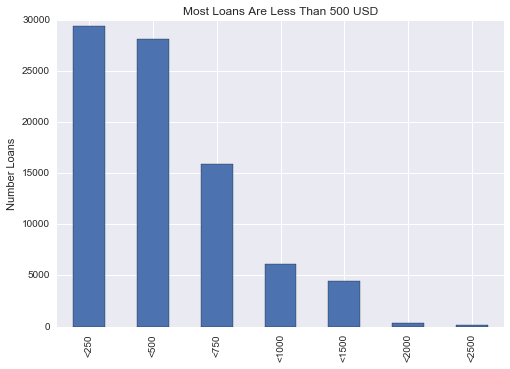

In [31]:
loans.value_counts().plot(kind='bar',title='Most Loans Are Less Than 500 USD').set_ylabel('Number Loans');

### Defaults On Loans Are Rare

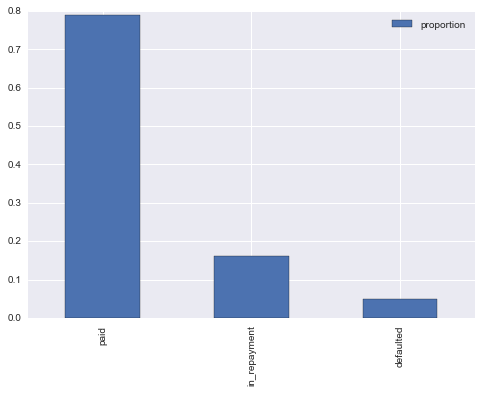

In [32]:
series1=df2d.status.value_counts()/df2d.status.value_counts().sum()
#series1
pd.DataFrame({'proportion':series1}).plot(kind='bar')
#pd.DataFrame(series1,columns='proportion',index=series1.index())

In [34]:
df2e=df2b[(df2b.num_borrowers==1)&((df2b.prop_female==1)|(df2b.prop_female==0))]

In [59]:
sex_status=df2e.groupby(['status','prop_female']).size().unstack('status')

In [61]:
sex_status['total']=sex_status.paid+sex_status.in_repayment+sex_status.defaulted

In [62]:
sex_status['prop_defaulted']= sex_status.defaulted/sex_status.total
sex_status

status,defaulted,in_repayment,paid,total,prop_defaulted
prop_female,,,,,
0.0,1242,3780,23026,28048,0.044281
1.0,2369,8571,39993,50933,0.046512


### Default Rates For Men And Women Are Similar

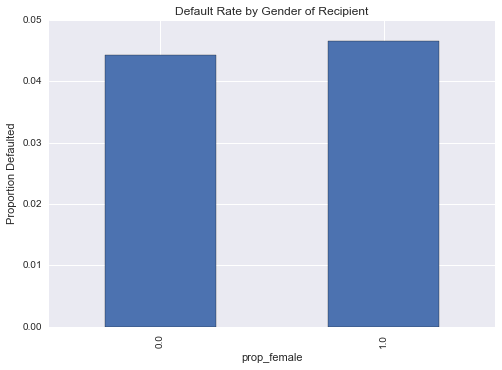

In [73]:
graph1=sex_status.iloc[:,4].plot(kind='bar',title='Default Rate by Gender of Recipient').set_ylabel('Proportion Defaulted')

In [86]:
df2f=df2b[['num_borrowers','funded_amount','lender_count']].groupby('num_borrowers',as_index=False).mean()
df2f

,num_borrowers,funded_amount,lender_count
0,1,438.915056,13.851129
1,2,380.360825,12.010309
2,3,813.666667,26.344444
3,4,1181.807780,37.782609
4,5,1515.092593,49.233333
5,6,1431.783537,46.597561
6,7,1417.291667,46.283333
7,8,1445.182292,45.770833
8,9,1440.409836,44.629508
9,10,956.516768,29.538110


### Larger Loans Involve More Lenders

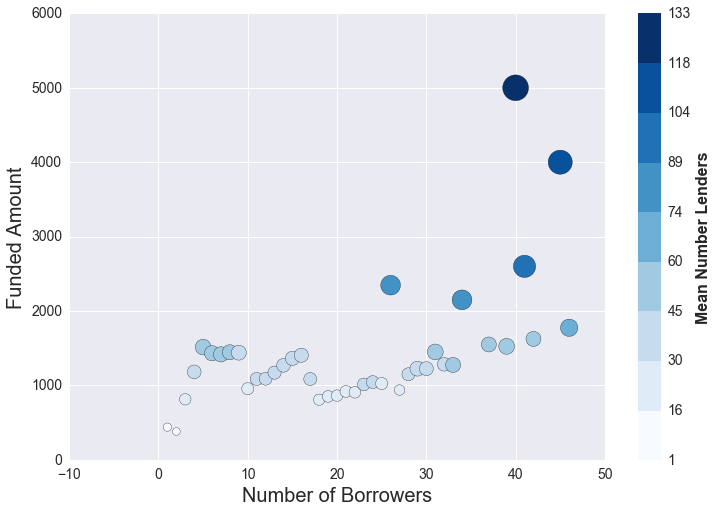

In [248]:
color=df2f['lender_count']#/df2f['lender_count'].max()   #define the colors on raw values

fig=plt.figure(figsize=(12,8)) #,facecolor='white')          #open a figure
ax=fig.add_subplot(1,1,1) #,axisbg='white')                #open a plot in the figure 
ax.set_xlabel('Number of Borrowers',fontsize=20)
ax.set_ylabel('Funded Amount',fontsize=20)
ax.spines['bottom'].set_color('red')                   #This does not work here
for child in ax.get_children():
    if isinstance(child, mpl.spines.Spine):
        child.set_color('black')
ax.grid(True,color='white')
for tick in ax.xaxis.get_major_ticks():                 #set the size of the tick labels on the x-axis
                tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():                 #set the size of the tick labels on the y-axis
                tick.label.set_fontsize(14)
                #tick.label.set_rotation('vertical')    # you can rotate the tick labels

cmap=plt.cm.Blues                                        #define a colormap, see http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
                                                         
bounds=np.linspace(1,df2f['lender_count'].max(),10,      #determine the breaks for the intervals in the colorbar
                   endpoint=True).round()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)           #adjust the color intervals to the breaks
scat = plt.scatter(df2f.num_borrowers,df2f.funded_amount,c=color,s=(df2f.lender_count * 5),norm=norm,cmap=cmap)
cb=fig.colorbar(scat,ax=ax)                           #plot the colorbar
cb.ax.tick_params(labelsize=14)
cb.set_label(label='Mean Number Lenders',size=16,weight='bold')
#cb.set_label(label='a label',weight='bold')
plt.show()

## 3. Correlations, Insights, Questions and Hypotheses
#### Most Kiva loans in Kenya are in the agricultural, food, and retail sectors. The loans vary greatly in size, ranging from 25 to 50,000 USD.  The majority of loans have been for less than 500 USD. The number of lenders that contribute to a loan increases with loan size, which certainly is not surprising.  The number of loans made per year in Kenya decreased for two years until 2014, but then rebounded substantially in 2015.  This rebound was associated with an increase in the number of agricultural loans made to women.  The rate of default on loans is about 5%, with the default rate on single-borrower loans being roughly equal.
**Questions and Hypotheses**: 
>What activities are subsumed by agricultural loans to women? I predict that they are primarily used for materials to increase productivity, such as newer seed varieties and fertilizer.

>Do agricultural loans to women differ somehow from similar loans to men? It may be that women are commercializing household gardens, which in the data base may be described differently from loans to men

>Some loans expire, having never been funded by Kiva donors.  Do these loans or the applicants somehow differ from the loans that recieve Kiva funding? It may be that there is *something about the loan that raises doubts* about the use to which the funds would go.

>Is there anything that characterizes the loans or borrowers who end up in default? Are they *randomly distributed among loans of all sizes*?  Are they *geographically clustered*?  I predict that defaults are not randomly distributed among all loans, but I do not yet see a basis for making a distinct hypothesis as to how they might be characterized.

>How do loans with multiple borrowers differ from loans with only a single borrower?  It may be that these loans are for more-complicated undertakings, ones that necessitate a larger social group or have a complicated administrative structure.

>How are the funded loans distributed around Kenya? The increase in agriculture-sector loans to womend suggests that there may be increasing focus on rural areas.

**Narrative**:
>The Kiva loan program represents thousands of loans within Kenya.  These loans are generally small (<500 USD) and impact a range of sectors in Kenyan society.  The default rate on loans is about 5%, and men and women borrowers have similar risk of defaults.  Recently, more loans have been given to women in the agricultural sector. These loans appear to be driving the overall increase in Kiva loans over the last two years.  It would be interesting to know how these agricultural loans to women are being used, and if they indicate an increasingly rural emphasis in Kiva microloan activity.


